<a href="https://colab.research.google.com/github/suprit-chafle/BranchRepository/blob/GitNewBranch/NMASS4Q2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

x = np.array([0, 0.4, 0.8, 1.2, 1.6])
y = np.array([2.90, 3.10, 3.56, 4.60, 6.70])
n = len(x)

# calculate the powersum

def powSum(p):
  psum = 0

  for i in range(n):
    psum = psum + x[i]**p

  return psum

def getA(deg):
    A = np.zeros((deg+1, deg+1))

    for i in range(deg+1):
      for j in range(i,deg+1):
        A[i][j] = powSum(i+j)
        A[j][i] = A[i][j]

    return A

def getY(deg):
    b = np.zeros(deg+1)

    for i in range(deg+1):
      temp = 0
      for j in range(n):
         temp = temp + y[j]*(x[j]**i)
      b[i] = temp

    return b

def leastSqure(deg):
     A = getA(deg)
     b = getY(deg)
     sol = np.linalg.solve(A,b)
     return sol

def solvePolynomial(t,sol,deg):
    ans = 0
    while( deg >= 0 ):
        ans = ans + sol[deg]*(t**deg)
        deg = deg-1

    return ans

def leastSqureEstimates(params, deg):
    py = np.zeros(n)

    for i in range(n):
        py[i]=solvePolynomial(x[i], params, deg)

    return py

qud =  leastSqure(2)
cub =  leastSqure(3)

pyq = leastSqureEstimates(qud, 2)
pyc = leastSqureEstimates(cub, 3)


In [7]:
print("Estimatated value by quadratic polynomia ",pyq)
print("Estimatated value by cubic polynomia ",pyc)

Estimatated value by quadratic polynomia  [2.97771429 2.94914286 3.54628571 4.76914286 6.61771429]
Estimatated value by cubic polynomia  [2.89771429 3.10914286 3.54628571 4.60914286 6.69771429]


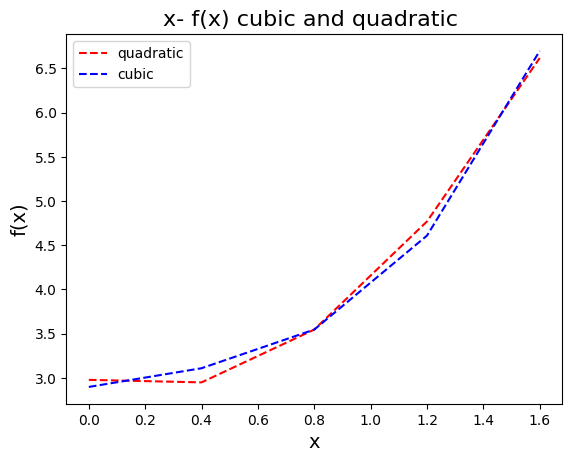

In [14]:
import matplotlib.pyplot as plt

x1 = list(x)
y1 = np.array(pyq).T

x2 = list(x)
y2 = np.array(pyc).T

# plotting
plt.title("x- f(x) cubic and quadratic " , size=16)
plt.xlabel("x", size=14)
plt.ylabel("f(x)", size=14)
plt.plot(x1, y1,linestyle='dashed', color="red")
plt.plot(x2, y2,linestyle='dashed', color="blue")
plt.legend(["quadratic","cubic"])
plt.show()